In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
run binned_fit_test.py

Performing fit with initial parameters:
a1	= 0.000
a2	= 0.000
a3	= 0.000
Fit finished with status: 0
Calculating covariance of parameters...


RESULTS
-------
[-0.957  0.399 -0.126] [ 0.016  0.023  0.024]
a1	= -0.957 +/- 0.016
a2	= 0.399 +/- 0.023
a3	= -0.126 +/- 0.024


CORRELATION MATRIX
------------------
[[ 1.    -0.455  0.133]
 [-0.455  1.    -0.448]
 [ 0.133 -0.448  1.   ]]


Performing fit with initial parameters:
mu	= 120.000
sigma	= 2.000
Fit finished with status: 0
Calculating covariance of parameters...


RESULTS
-------
[ 125.772    2.775] [ 0.181  0.128]
mu	= 125.772 +/- 0.181
sigma	= 2.775 +/- 0.128


CORRELATION MATRIX
------------------
[[  1.000e+00   7.046e-06]
 [  7.046e-06   1.000e+00]]


[  617.087  2197.959  1041.91    558.411   817.188   769.291   410.175
   512.33    865.314  1535.703   672.466]
[  1.488e-15   5.054e-06   2.551e-02   9.929e-01   4.461e+01   1.558e+02
   3.129e+01   3.235e+00   1.750e-02   4.259e-10   2.756e-46]
[ 619 2164 1031  564  880  906  44

In [67]:
result = binned_model.fit(bc, ix = ibc, params = binned_params)

In [68]:
print result.fit_report()

[[Model]]
    Model(lm_binned)
[[Fit Statistics]]
    # function evals   = 14
    # data points      = 11
    # variables        = 1
    chi-square         = 2123.032
    reduced chi-square = 212.303
    Akaike info crit   = 60.938
    Bayesian info crit = 61.336
[[Variables]]
    A:      0.92513184 +/- 0.092549 (10.00%) (init= 0.1)
    ntot:   10236 (fixed)
[[Correlations]] (unreported correlations are <  0.100)



In [69]:
width = be_hybrid[1:] - be_hybrid[:-1]

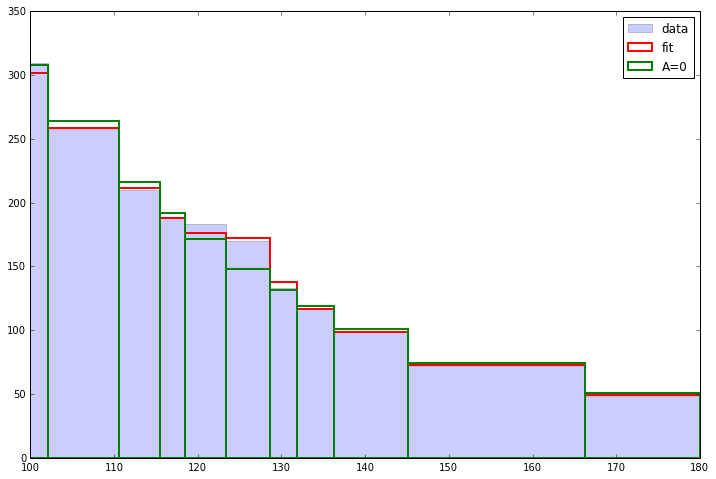

In [85]:
plt.bar(be_hybrid[:-1], bc/width, width = width, alpha=0.2, label='data')
plt.bar(be_hybrid[:-1], result.best_fit/width, fill=False, linewidth=2, width = width, edgecolor='red', label='fit')
plt.bar(be_hybrid[:-1], result.eval(A=0)/width, fill=False, linewidth=2, width = width, edgecolor='green', label='A=0')

plt.legend()

In [89]:
from scipy.stats import poisson
import numpy as np

In [97]:
nll_bg = -np.sum(np.log(poisson.pmf(bc,result.eval(A=0))))
nll_sig = -np.sum(np.log(poisson.pmf(bc,result.best_fit)))

print nll_bg, nll_sig

59.9999603027 48.4338729647


In [95]:
q0=2*(nll_bg-nll_sig)

In [96]:
print np.sqrt(q0)

4.80959194484
